# <center> Happiness Score Prediction Using Machine Learning

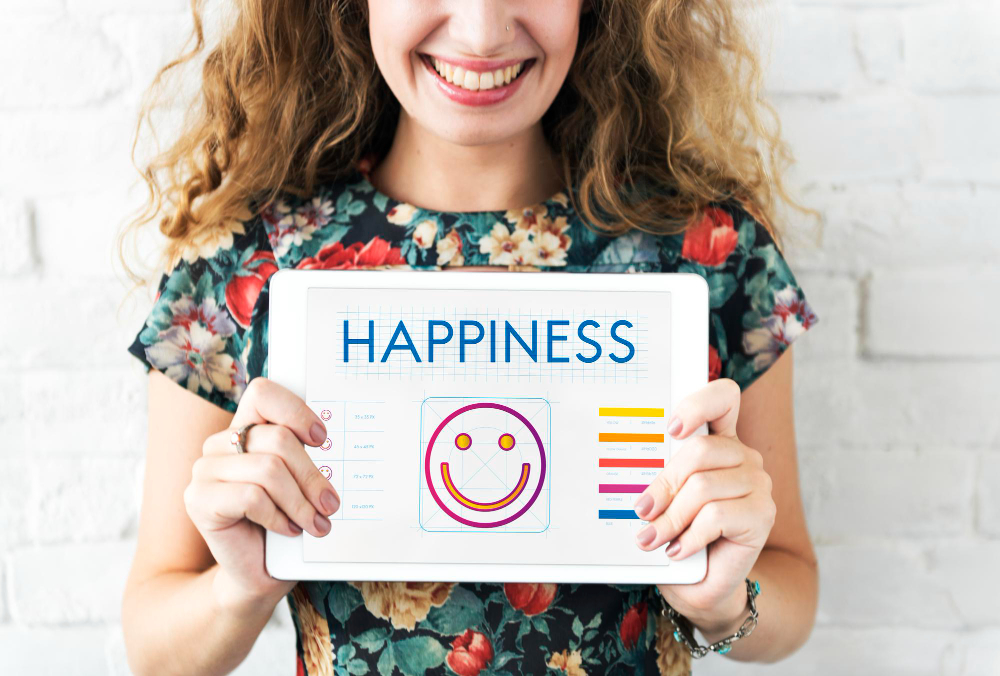

In this project we processing and exploring a large amount of data on Worldwide Happiness Score Correption.The dataset includes information about worldwide happiness scores and corruption perception index (CPI) values for the years 2015-2020.


##### You can download the dataset from the link given below
##### https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#### Loading the dataset

In [2]:
data=pd.read_csv("./WorldHappiness_Corruption.csv")
data

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


#### Data Exploration

In [3]:
data.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [4]:
data.tail()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
787,Botswana,3.4789,0.997549,0.0,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.0,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.0,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.0,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24
791,Afghanistan,2.5669,0.300706,0.0,0.266052,0.000000,0.135235,0.001226,1.507236,Asia,2020,0.356434,19


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [6]:
data.shape

(792, 13)

In [7]:
data.tail()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
787,Botswana,3.4789,0.997549,0.0,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.0,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.0,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.0,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24
791,Afghanistan,2.5669,0.300706,0.0,0.266052,0.000000,0.135235,0.001226,1.507236,Asia,2020,0.356434,19


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,792.0,5.473310,1.124726,2.5669,4.590750,5.485500,6.300500,7.808700
gdp_per_capita,792.0,0.929217,0.385774,0.0000,0.644242,0.994544,1.228677,2.096000
family,792.0,0.504998,0.552736,0.0000,0.000000,0.000000,1.040410,1.610574
health,792.0,0.648691,0.232261,0.0000,0.510070,0.685397,0.815641,1.141000
freedom,792.0,0.427016,0.148003,0.0000,0.325433,0.439621,0.546280,0.724000
generosity,792.0,0.212440,0.121660,0.0000,0.125784,0.197000,0.273250,0.838075
government_trust,792.0,0.125720,0.109032,0.0000,0.052862,0.089000,0.154250,0.551910
dystopia_residual,792.0,1.379277,1.075276,0.0000,0.000000,1.731948,2.236894,3.602140
Year,792.0,2017.500000,1.708904,2015.0000,2016.000000,2017.500000,2019.000000,2020.000000
social_support,792.0,0.609302,0.640754,0.0000,0.000000,0.176214,1.268250,1.644000


##### Checking the null values

In [9]:
data.isnull().mean()*100

Country              0.0
happiness_score      0.0
gdp_per_capita       0.0
family               0.0
health               0.0
freedom              0.0
generosity           0.0
government_trust     0.0
dystopia_residual    0.0
continent            0.0
Year                 0.0
social_support       0.0
cpi_score            0.0
dtype: float64

##### Checking the duplicated values

In [10]:
data.duplicated().sum()

0

#### Univariate Analysis

##### Histogram

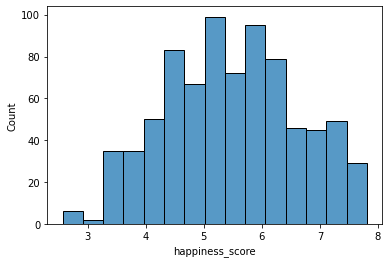

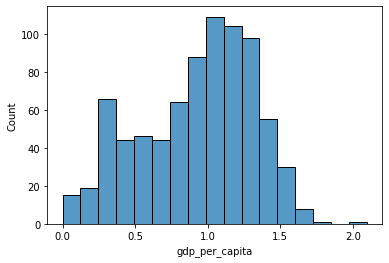

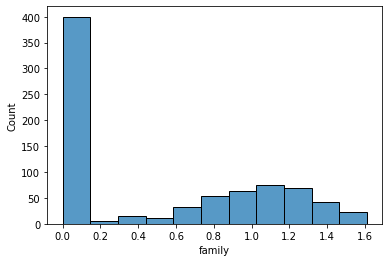

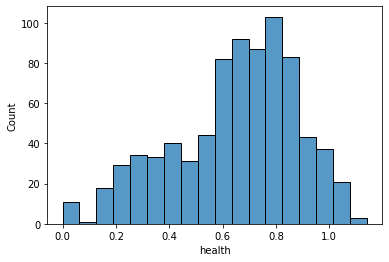

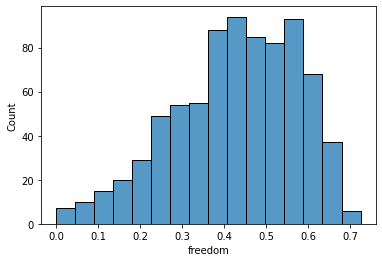

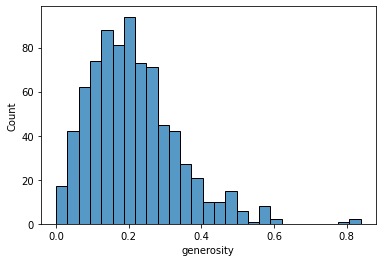

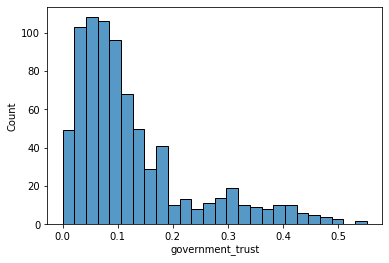

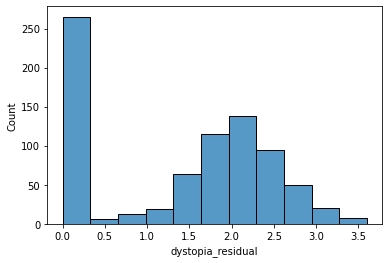

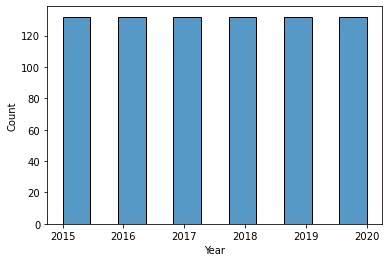

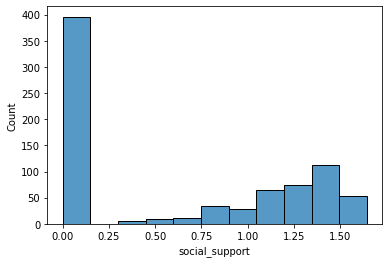

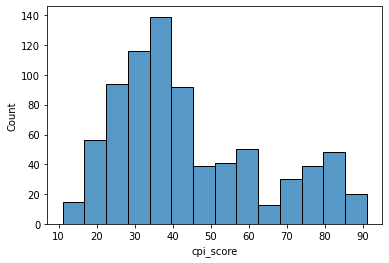

In [11]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.histplot(x=data[i])
        plt.show()

##### KDE Plot

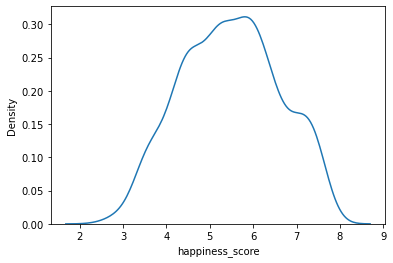

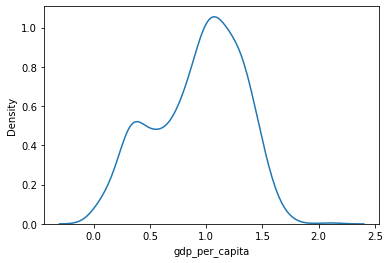

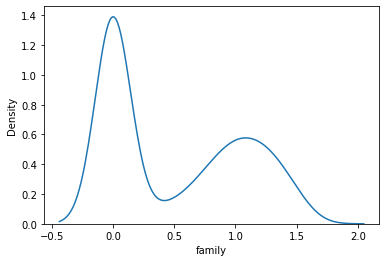

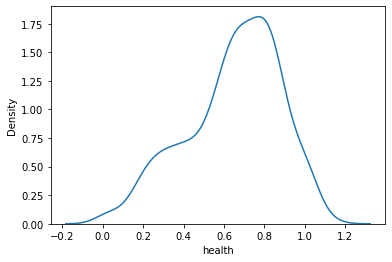

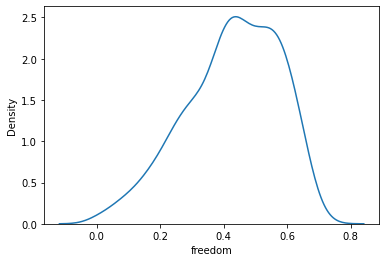

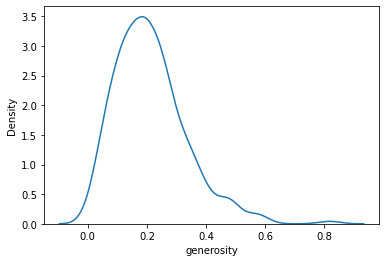

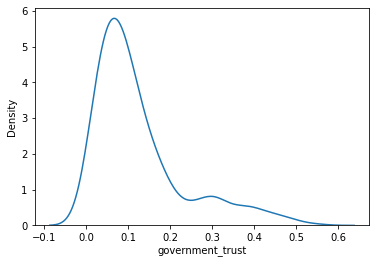

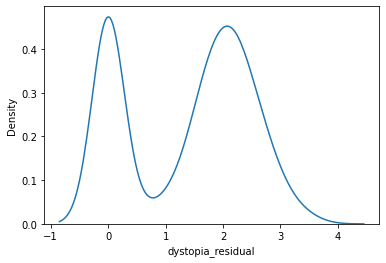

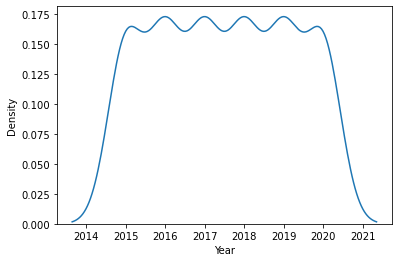

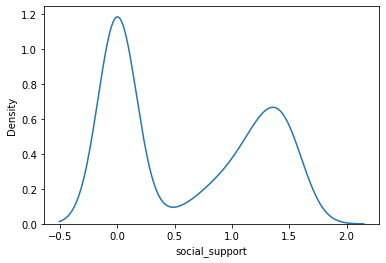

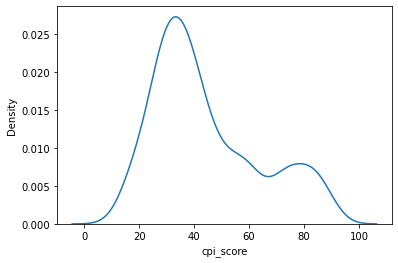

In [12]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.kdeplot(x=data[i])
        plt.show()

##### Box Plot

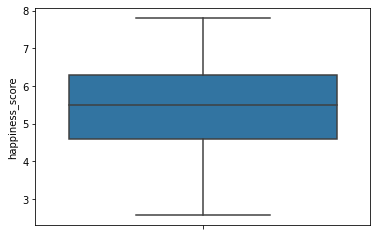

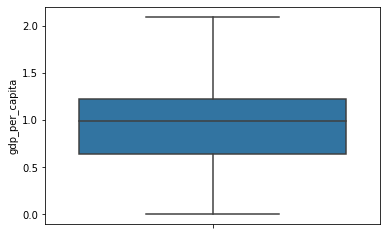

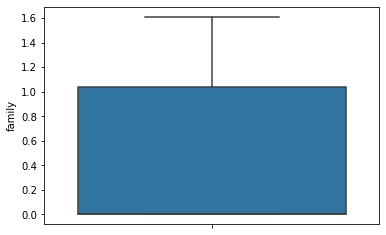

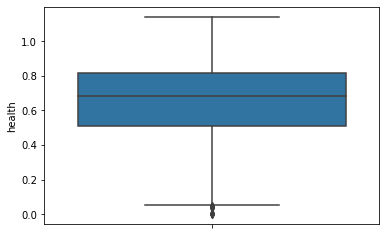

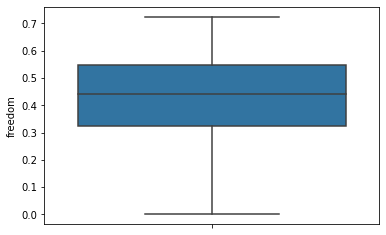

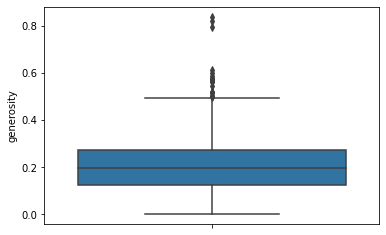

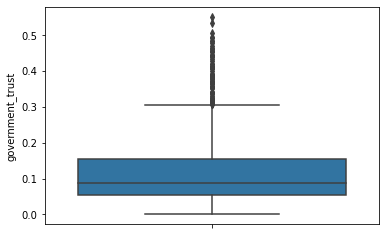

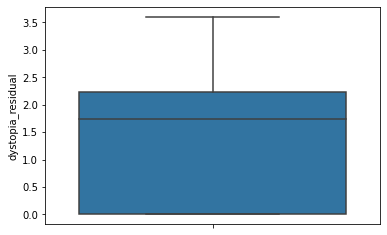

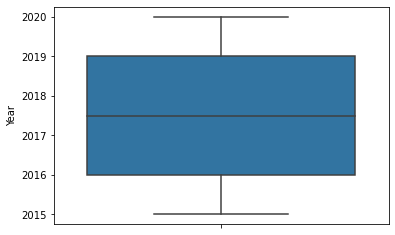

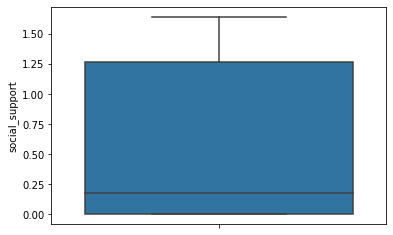

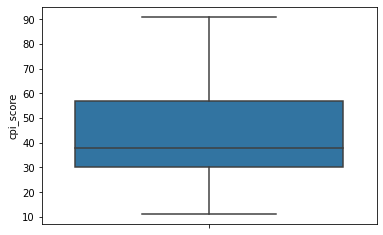

In [13]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i])
        plt.show()

#### Outlier Treatment

In [14]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [15]:
for column in data.columns:
    if data[column].dtype !="object":
        UL,LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])
        

##### After the Outlier treatment  drop the null values

In [16]:
data.dropna(inplace=True)

###### Now again plot the Box Plot

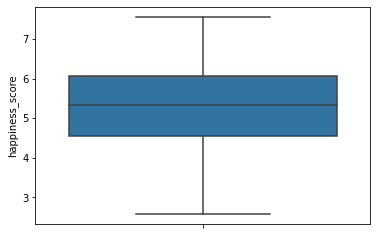

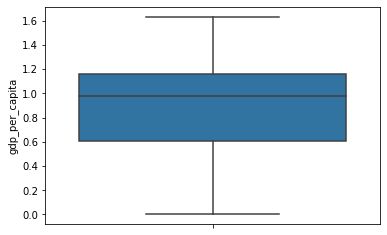

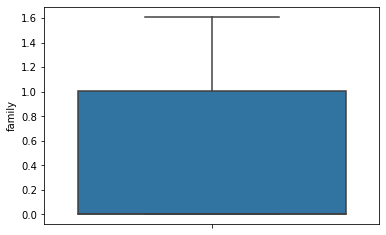

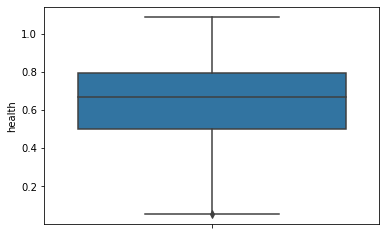

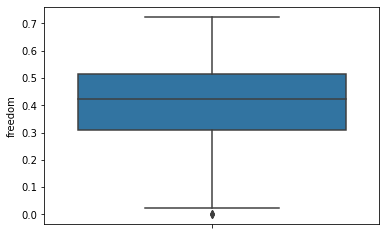

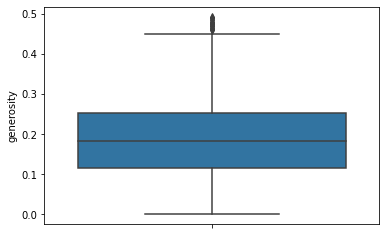

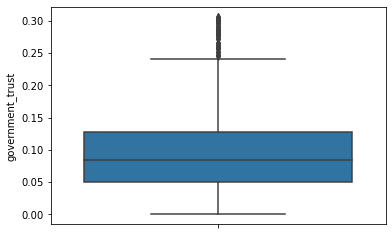

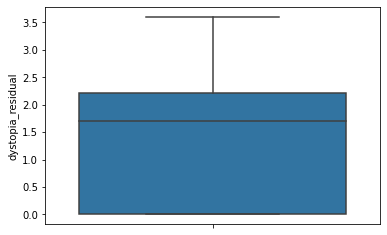

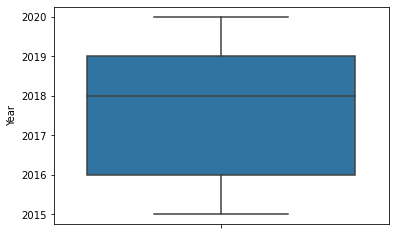

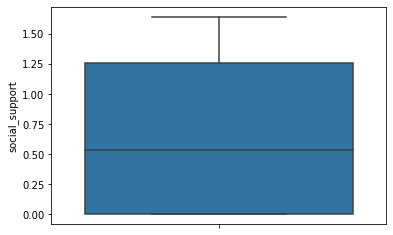

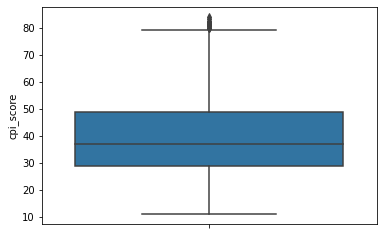

In [17]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i])
        plt.show()

### Multivariate Analysis

##### Bar Chart

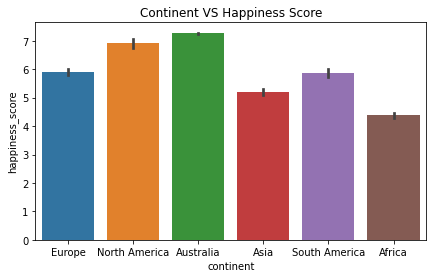

In [26]:
plt.figure(figsize=(7,4))
plt.title('Continent VS Happiness Score')
sns.barplot(x= 'continent', y= 'happiness_score', data=data);

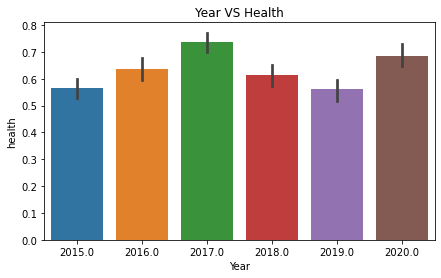

In [28]:
plt.figure(figsize=(7,4))
plt.title('Year VS Health')
sns.barplot(x= 'Year', y= 'health', data=data);

##### Scatter Plot

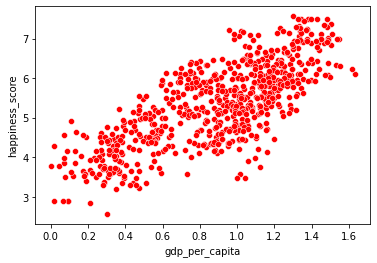

In [29]:
sns.scatterplot(data=data,x="gdp_per_capita",y="happiness_score",color="Red");

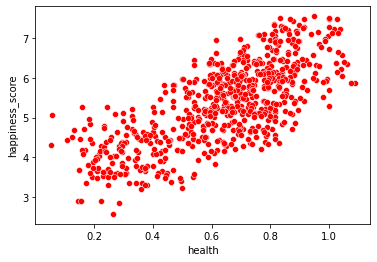

In [30]:
sns.scatterplot(data=data,x="health",y="happiness_score",color="Red");

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 2 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            688 non-null    object 
 1   happiness_score    688 non-null    float64
 2   gdp_per_capita     688 non-null    float64
 3   family             688 non-null    float64
 4   health             688 non-null    float64
 5   freedom            688 non-null    float64
 6   generosity         688 non-null    float64
 7   government_trust   688 non-null    float64
 8   dystopia_residual  688 non-null    float64
 9   continent          688 non-null    object 
 10  Year               688 non-null    float64
 11  social_support     688 non-null    float64
 12  cpi_score          688 non-null    float64
dtypes: float64(11), object(2)
memory usage: 75.2+ KB


##### Line Chart

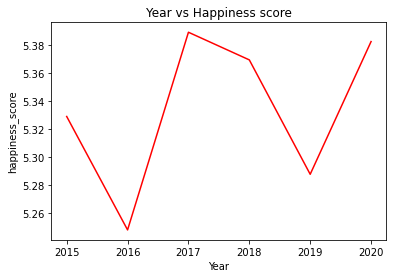

In [40]:
sns.lineplot(data=data,x="Year",y="happiness_score",color="Red",ci=None);
plt.title("Year vs Happiness score");

##### Pair Plot

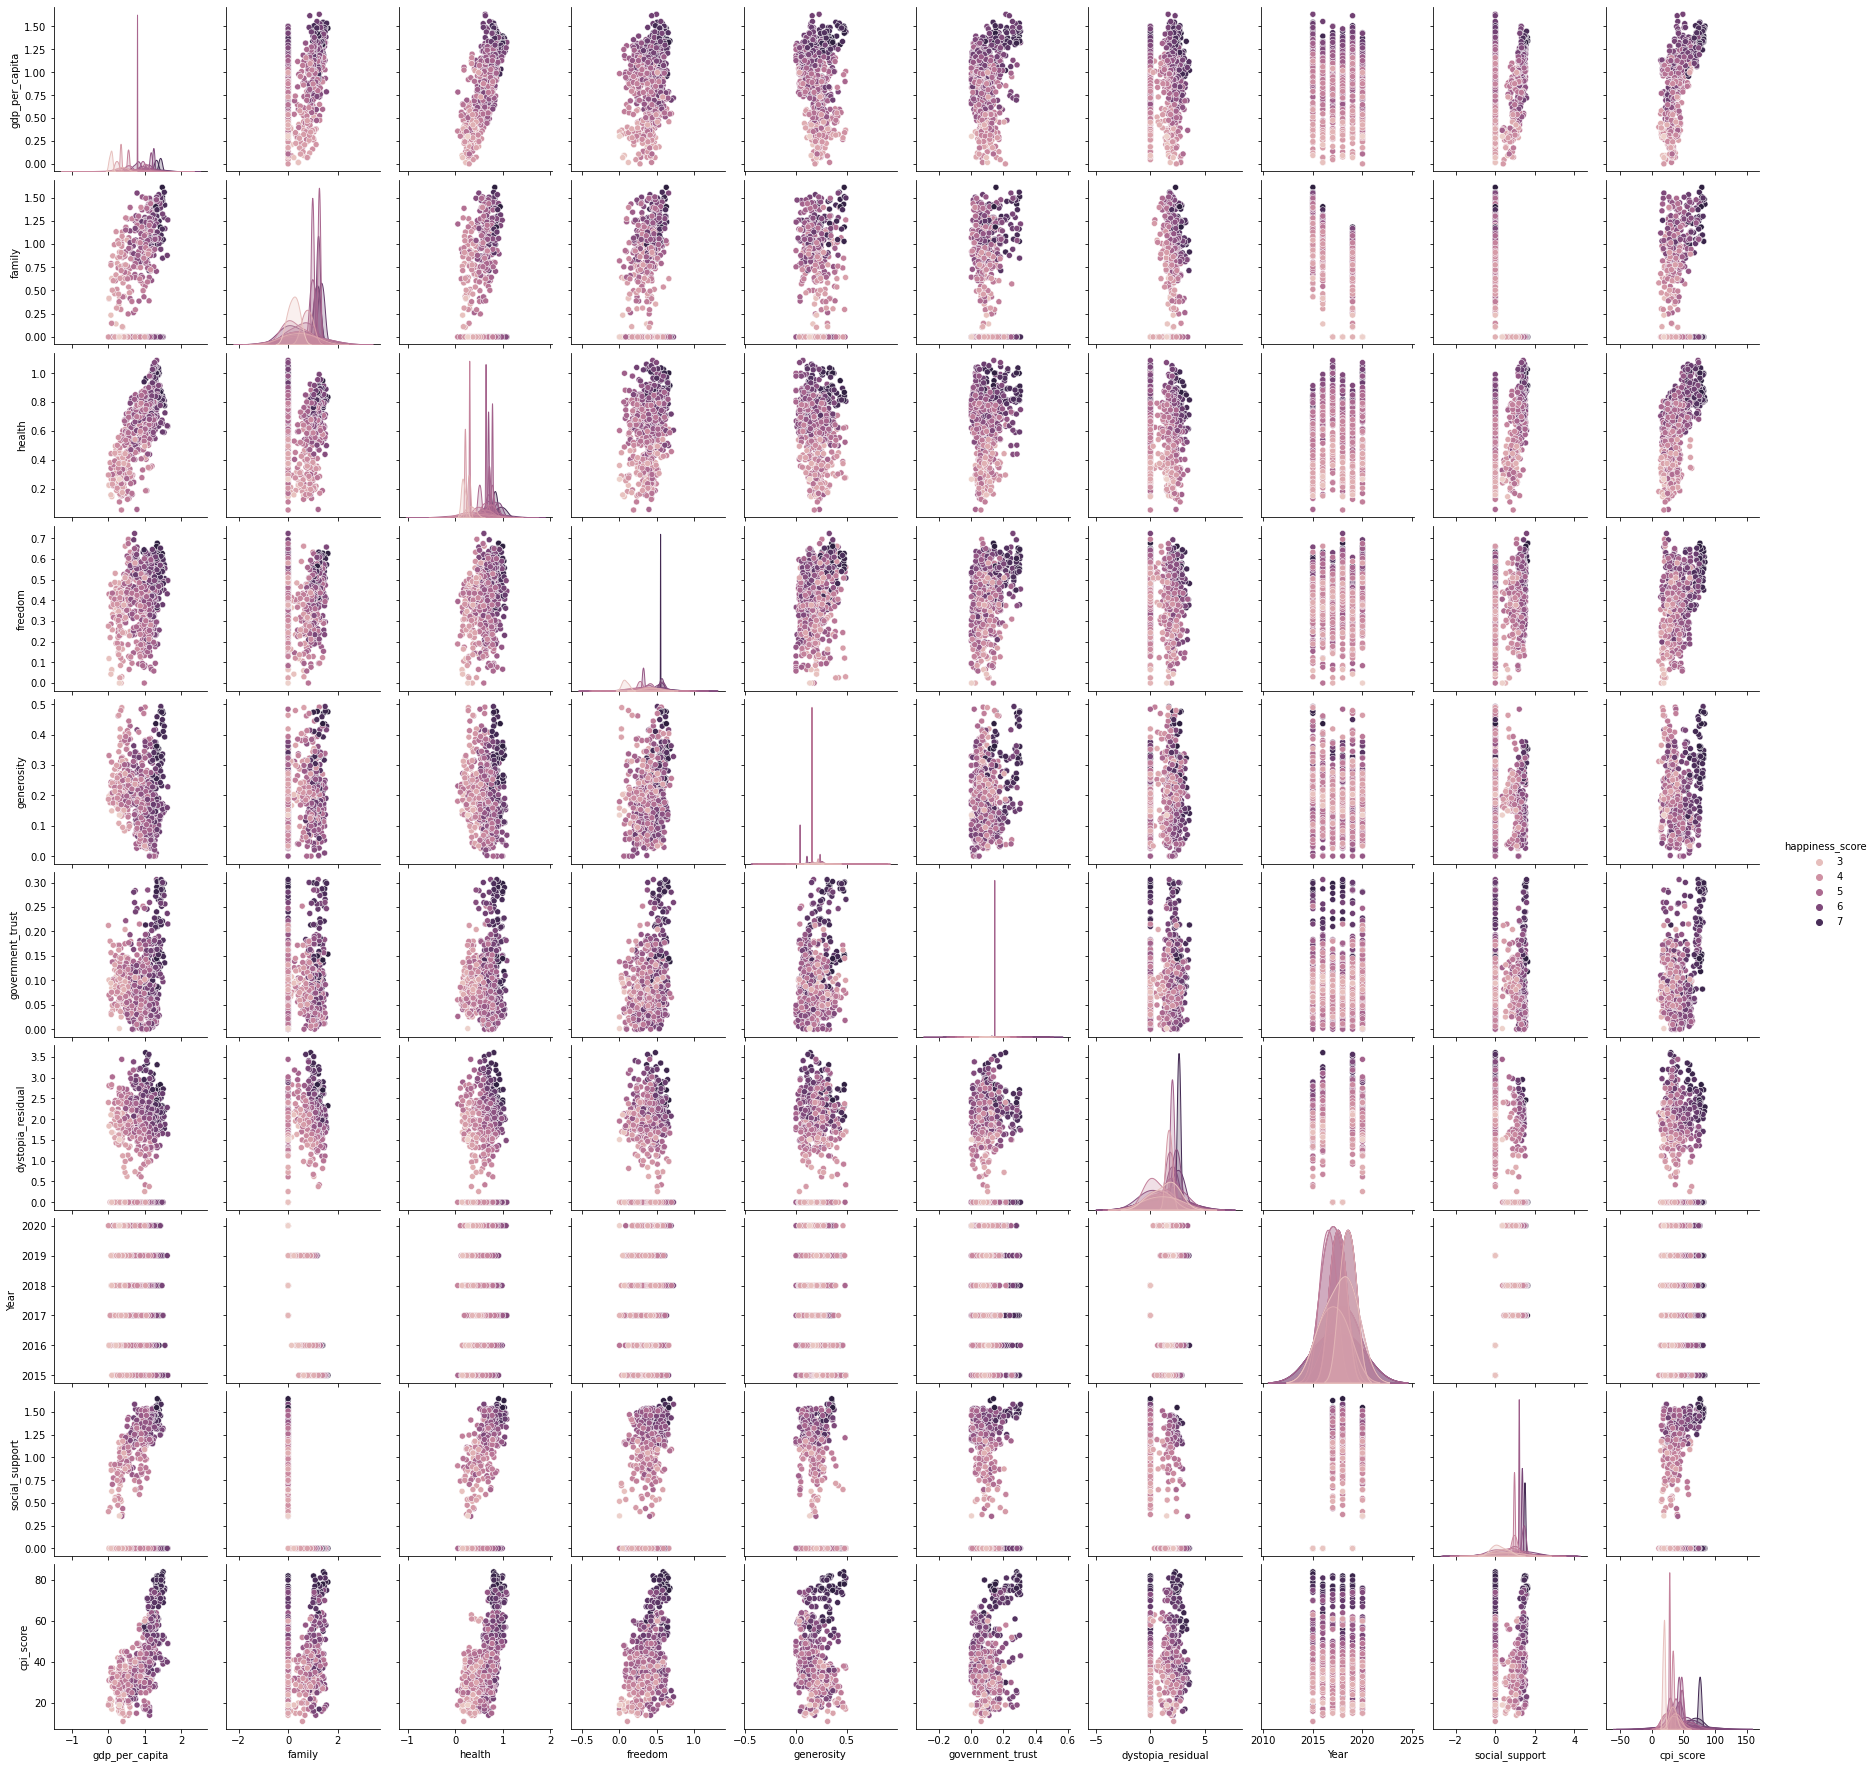

In [45]:
sns.pairplot(data,hue="happiness_score");

#### Label Encoding

In [ ]:
le = LabelEncoder()

In [ ]:
data["Country"]=le.fit_transform(data["Country"])
data["continent"]=le.fit_transform(data["continent"])

#### Let's check the correlation of  other variables with the target variable "Happiness Score"

In [ ]:
sns.heatmap(data.corr()[["happiness_score"]].sort_values(by="happiness_score",ascending=False),vmin=-1,vmax=1,annot=True,cmap="Greens");

#### Let's take only the variables which has good correlation with the target variable "Happiness Score"

In [ ]:
data.columns

In [ ]:
x=data[["gdp_per_capita","health","continent","cpi_score","freedom","social_support","dystopia_residual","government_trust","family","Year"]].values
y=data[["happiness_score"]].values

#### Scaling

In [ ]:
sc = StandardScaler()

In [ ]:
x=sc.fit_transform(x)

In [ ]:
models ={
    "LinearRegression":LinearRegression(),
    "RidgeRegression":Ridge(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "DecisionTreeRegresssor":DecisionTreeRegressor(),
    "LinearSvr":LinearSVR(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [ ]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse =np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print("AVG RMSE : ",rmse_avg)
    print("*"*100)

#### Since the Gradient Regression has minimum rmse value. So select Gradient Regression as model

In [ ]:
model=GradientBoostingRegressor()

##### Split the datase into training and testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

###### Fit the model with the training data

In [ ]:
model.fit(x_train,y_train)

###### We can check the efficiency of the model

In [ ]:
training_score = model.score(x_train,y_train)*100
testing_score = model.score(x_test,y_test)*100
R2_score = r2_score(y_test,model.predict(x_test))*100
mae = mean_absolute_error(y_test,model.predict(x_test))
mse = mean_squared_error(y_test,model.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",R2_score)
print("training_score: ",training_score)
print("testing_score: ",testing_score)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)

###### Predicting values using the model

In [ ]:
y_pred=model.predict(x)

###### After predicting we can compare it with the actual value

In [ ]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("actual","predicted"),dtype="float")
OUTPUT.head()

In [ ]:
sns.scatterplot(data=OUTPUT,x="actual",y="predicted",color="Purple");

##### We can Check the score of the model

In [ ]:
model.score(x,y)*100